<a href="https://colab.research.google.com/github/andreaaraldo/BROKEN-PJ/blob/master/DRT-Tuesday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!wget https://raw.githubusercontent.com/andreaaraldo/drt-accessibility/main/graph.py
!wget https://raw.githubusercontent.com/andreaaraldo/drt-accessibility/main/ptline.py
!wget https://github.com/andreaaraldo/drt-accessibility/blob/main/OpenStreetMap_Montreal.png?raw=true -O OpenStreetMap_Montreal.png

--2024-01-17 10:40:15--  https://raw.githubusercontent.com/andreaaraldo/drt-accessibility/main/graph.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9206 (9.0K) [text/plain]
Saving to: ‘graph.py.1’

graph.py.1          100%[===================>]   8.99K  --.-KB/s    in 0.001s  

2024-01-17 10:40:15 (10.2 MB/s) - ‘graph.py.1’ saved [9206/9206]

--2024-01-17 10:40:15--  https://raw.githubusercontent.com/andreaaraldo/drt-accessibility/main/ptline.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1098 (1.1K) [text/plain]
Saving to

In [68]:
import numpy as np
import networkx as nx
import sys
import random
import pylab
import matplotlib.pyplot as plt
import matplotlib.image as mping
import math

import graph
import ptline

## 1. Load data ( Metro lines of Montreal )

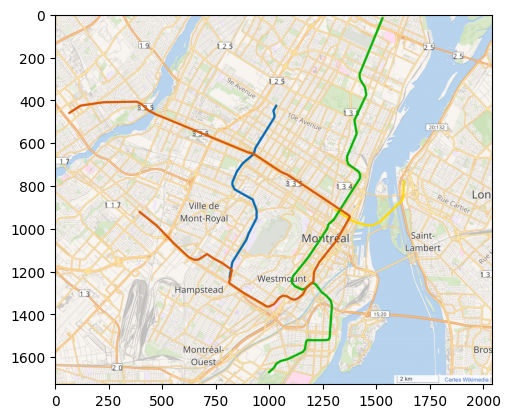

In [69]:
I = mping.imread('OpenStreetMap_Montreal.png')
plt.imshow(I)
plt.show()

In [70]:
metro_stations_line_1 = [[14.05154836,  2.22004959],
       [15.13790836,  2.73616959],
       [16.40851836,  3.37988959],
       [17.47221836,  3.64729959],
       [18.01638836,  3.91712959],
       [18.10515836,  4.92571959],
       [17.76756836,  5.73993959],
       [16.57472836,  6.18477958],
       [15.95520836,  7.01626959],
       [16.67042836,  7.62148959],
       [17.17587836,  8.20547959],
       [17.52006836,  8.55582959],
       [17.86689836,  9.01298959],
       [18.25563836,  9.32241959],
       [18.67550836,  9.78364959],
       [19.25245836, 10.18019959],
       [19.59719836, 10.74746959],
       [19.65296836, 11.79422959],
       [19.43340836, 12.69765959],
       [19.74151836, 13.26030959],
       [19.70125836, 14.01446959],
       [20.16622836, 14.78435959],
       [20.18756836, 15.73013959],
       [20.25642836, 16.56151959],
       [20.64989836, 17.20974959],
       [21.07493836, 17.94619959],
       [21.50316836, 18.73170959]]
len(metro_stations_line_1)

27

In [71]:
metro_stations_line_2 = [[ 0.92403836, 14.53674959],
       [ 2.36173836, 14.78556959],
       [ 5.34042836, 14.70845959],
       [ 6.89560836, 14.18925959],
       [ 8.23265836, 13.69205959],
       [10.09880836, 13.17780959],
       [11.23037836, 12.85979959],
       [12.86530836, 12.40494959],
       [13.87884836, 11.99772959],
       [14.63872836, 11.59941959],
       [15.83475836, 11.12267959],
       [16.37903836, 10.85119959],
       [17.78065836, 10.20538959],
       [18.67891836,  9.78210959],
       [19.16896836,  9.21395959],
       [18.84424836,  8.80706959],
       [18.45154836,  8.32185959],
       [17.99867836,  7.89824959],
       [17.57638836,  7.53073959],
       [16.94080836,  6.88745959],
       [16.57472836,  6.18477959],
       [15.86533836,  5.61398959],
       [13.98686836,  5.25989959],
       [12.21421836,  5.87677959],
       [11.34422836,  6.50641959],
       [10.75352836,  7.26794959],
       [10.18592836,  7.51962959],
       [ 8.58344836,  7.51951959],
       [ 7.62534836,  8.11439959],
       [ 6.16696836,  9.12716959],
       [ 5.29125836,  9.67485959]]
len(metro_stations_line_2)

31

In [72]:
metro_stations_line_3 = [[18.68309836,  9.77979959],
       [21.75055836,  9.47597959],
       [22.96374836, 10.84668959]]
len(metro_stations_line_3)

3

In [73]:
metro_stations_line_4 = [[11.34125836,  6.50311959],
       [11.82206836,  7.76184959],
       [12.44763836,  8.45946959],
       [12.98014836,  9.19998959],
       [12.74716836, 10.34948959],
       [11.83625836, 10.68916959],
       [11.69303836, 11.42825959],
       [12.20849836, 12.00685959],
       [12.87036836, 12.41550959],
       [13.50286836, 13.25161959],
       [14.17584836, 14.00676959],
       [14.39430836, 14.66038959]]
len(metro_stations_line_4)

12

In [74]:
nb_of_staions_each_metro_line = [ len(metro_stations_line_1),len(metro_stations_line_2),len(metro_stations_line_3),len(metro_stations_line_4) ]
print(nb_of_staions_each_metro_line)

cumsum_nb_of_staions_each_metro_line = np.cumsum( nb_of_staions_each_metro_line )
print(cumsum_nb_of_staions_each_metro_line)

[27, 31, 3, 12]
[27 58 61 73]


In [75]:
connection_between_lines = [[7, 47], [14, 40], [14, 58], [34, 69], [40, 58], [51, 61]]

We now visualize the graph

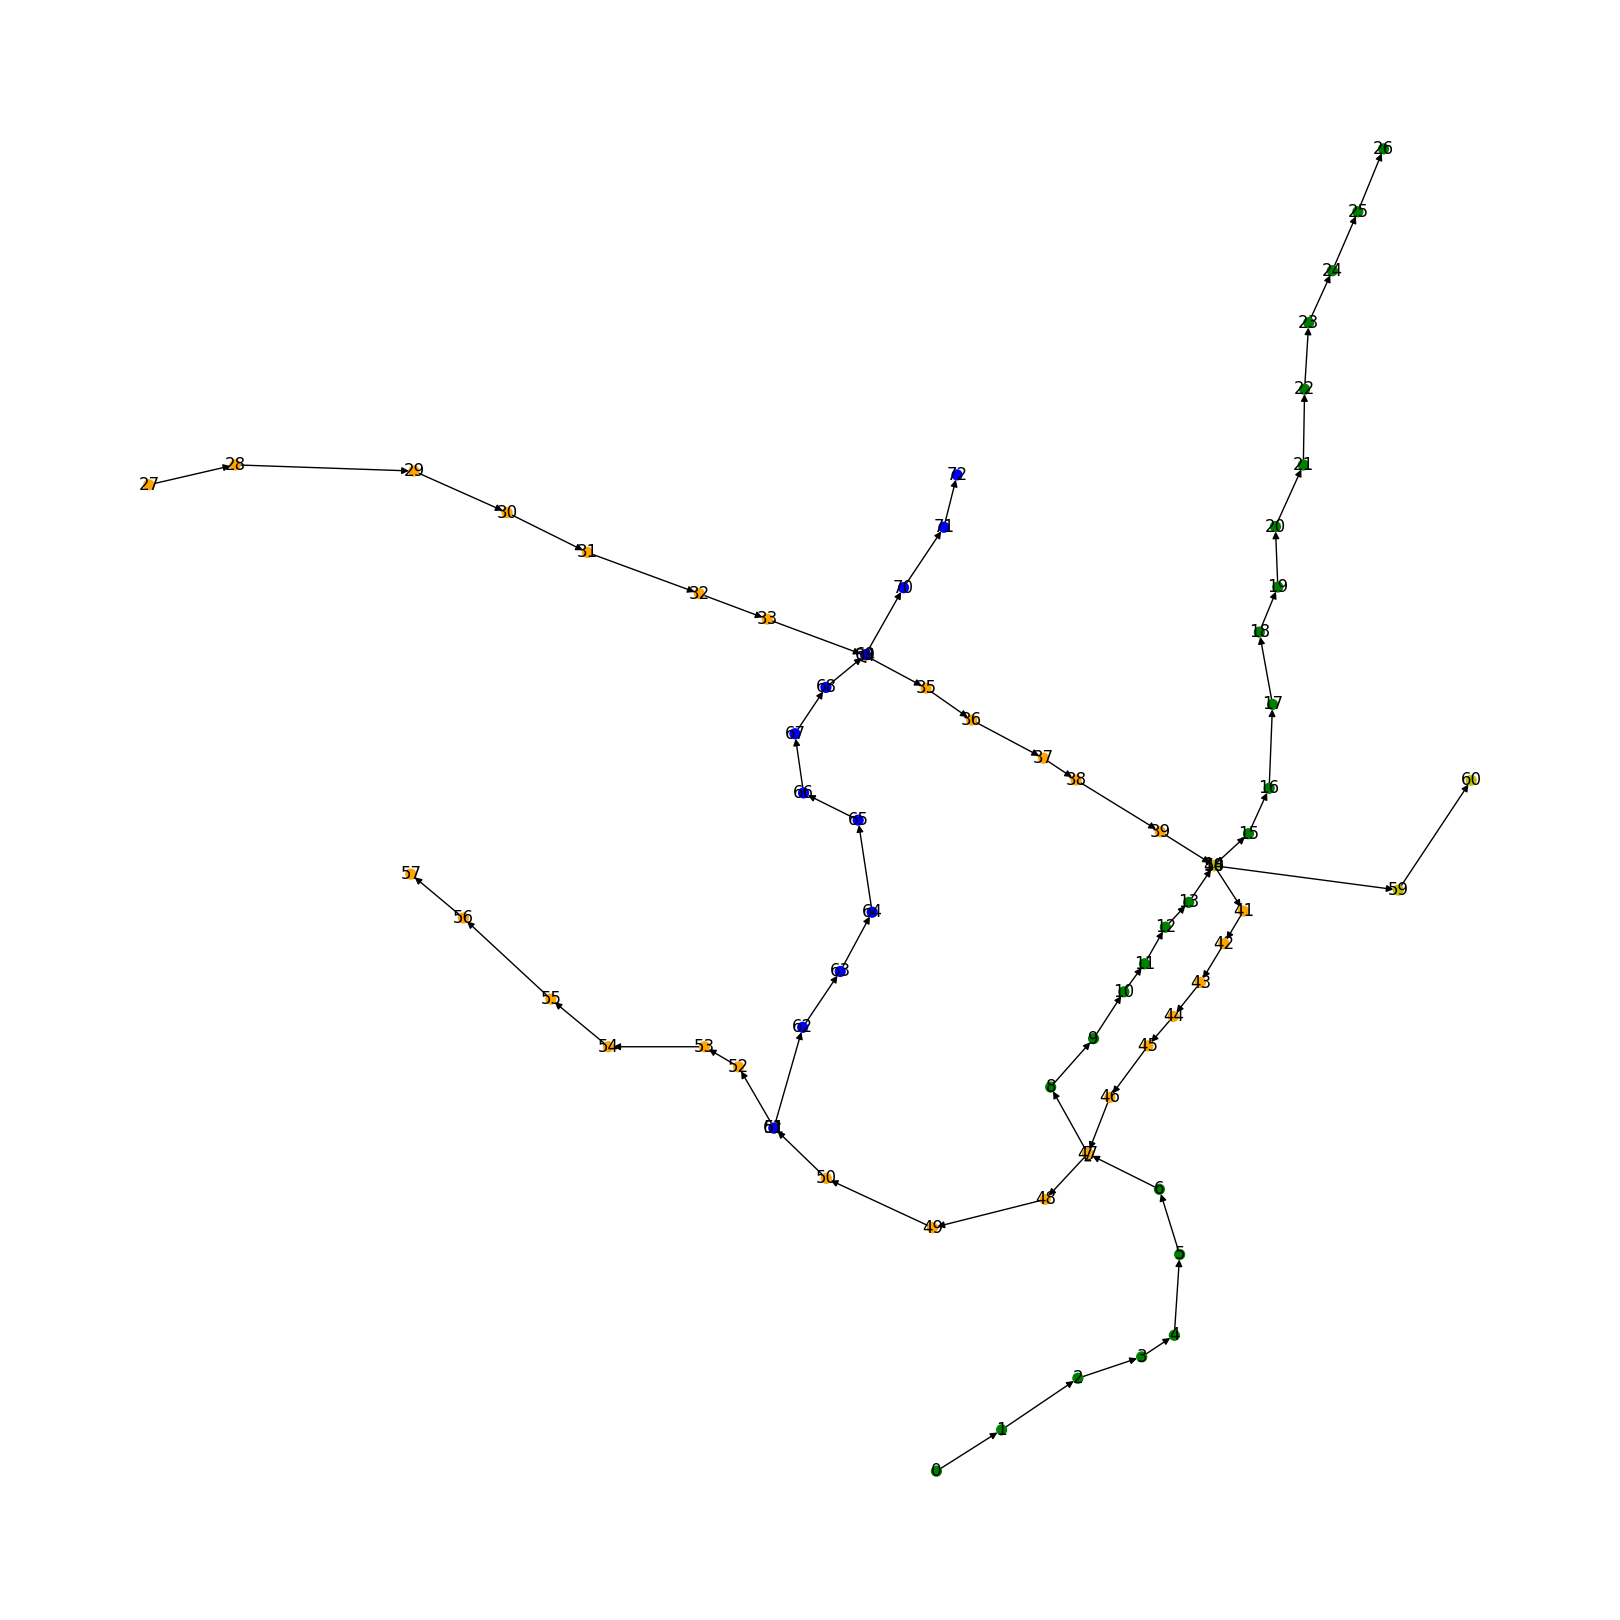

In [76]:
g = nx.DiGraph()

all_stations = metro_stations_line_1 +metro_stations_line_2 +metro_stations_line_3 +metro_stations_line_4
nb_of_all_stations = len(all_stations)


g.add_nodes_from([i for i in range(nb_of_all_stations)])

all_edges = [(i,i+1) for i in range(nb_of_all_stations) if i!= 26 and i!= 57 and i!= 60 and i!= 72] + connection_between_lines
g.add_edges_from(all_edges)

node_color=["green" for i in range(len(metro_stations_line_1))]+["orange" for i in range(len(metro_stations_line_2))]+["y" for i in range(len(metro_stations_line_3))]+["blue" for i in range(len(metro_stations_line_4))]
node_size=[50 for i in range(73)]

fig=plt.figure(figsize=(16,16))
nx.draw(g, all_stations, with_labels=True,node_color=node_color, node_size = node_size)
plt.show()

In [77]:
# metro dwell time for each station (hour)
dwell_time_1 = list(np.array([1,2,1,1,2,1,2,2,1,2,1,1,1,1,1,1,2,2,1,1,2,1,2,1,1,3])/60) #3 min/60 = 1/20 h

dwell_time_2 = list(np.array([1,3,2,1,2,1,2,1,2,1,5,1,1,1,2,2,1,2,1,2,2,2,1,2,1,1,1,2,1,2])/60)

dwell_time_3 = list(np.array([2,4])/60)

dwell_time_4 = list(np.array([1,1,2,3,2,1,1,1,2,1,2])/60)

In [78]:
# Assign ids to nodes
node_ids_line_1 = [i for i in range(cumsum_nb_of_staions_each_metro_line[0])]
node_ids_line_2 = [i for i in range(cumsum_nb_of_staions_each_metro_line[0],cumsum_nb_of_staions_each_metro_line[1])]
node_ids_line_3 = [i for i in range(cumsum_nb_of_staions_each_metro_line[1],cumsum_nb_of_staions_each_metro_line[2])]
node_ids_line_4 = [i for i in range(cumsum_nb_of_staions_each_metro_line[2],cumsum_nb_of_staions_each_metro_line[3])]
list_waiting_time = [7/60,7/60,7.5/60,7.5/60] # 7.5 mins/60 = 0.125 hour

#create bus_line
metro_line_1 = ptline.PTline( 'Angrignon--Honoré-Beaugrand',list_waiting_time[0],
                                 node_ids_line_1,
                                 dict( zip(node_ids_line_1, metro_stations_line_1)),
                                 dwell_time_1 )


metro_line_2 = ptline.PTline( 'Côte-Vert--Montmorency',list_waiting_time[1],
                                 node_ids_line_2,
                                 dict( zip(node_ids_line_2, metro_stations_line_2)),
                                 dwell_time_2 )

metro_line_3 = ptline.PTline( 'Berri–UQAM--Longueuil–Université-de-Sherbrooke',list_waiting_time[2],
                                 node_ids_line_3,
                                 dict( zip(node_ids_line_3, metro_stations_line_3)),
                                 dwell_time_3 )

metro_line_4 = ptline.PTline( 'Snowdon--Saint-Michel',list_waiting_time[3],
                                 node_ids_line_4,
                                 dict( zip(node_ids_line_4, metro_stations_line_4)),
                                 dwell_time_4 )

In [79]:
#create Public transit graph
g  = graph.Graph( list_waiting_time )

#add each bus_line
g.add_metro_line(metro_line_1)
g.add_metro_line(metro_line_2)
g.add_metro_line(metro_line_3)
g.add_metro_line(metro_line_4)

#add transfer station and time  (7,47,list_waiting_time[1]+2/60) means from line_1 (station 7) tansfer to line_2 (station 47),
#                                the time cost is average waiting time of line 2 + 2 mins of walking
connection_and_transfer_time = [(7, 47,list_waiting_time[1]+2/60), (47, 7,list_waiting_time[0]+2/60),
                                (14, 40,list_waiting_time[1]+2/60),(40, 14,list_waiting_time[0]+2/60),
                                (14, 58,list_waiting_time[2]+2/60),(58, 14,list_waiting_time[0]+2/60),
                                (34, 69,list_waiting_time[3]+2/60),(69, 34,list_waiting_time[1]+2/60),
                                (40, 58,list_waiting_time[2]+2/60),(58, 40,list_waiting_time[1]+2/60),
                                (51, 61,list_waiting_time[3]+2/60),(61, 51,list_waiting_time[1]+2/60)]

g.add_connection(connection_and_transfer_time)
#np.save( 'test_set.npy',graph_dic )

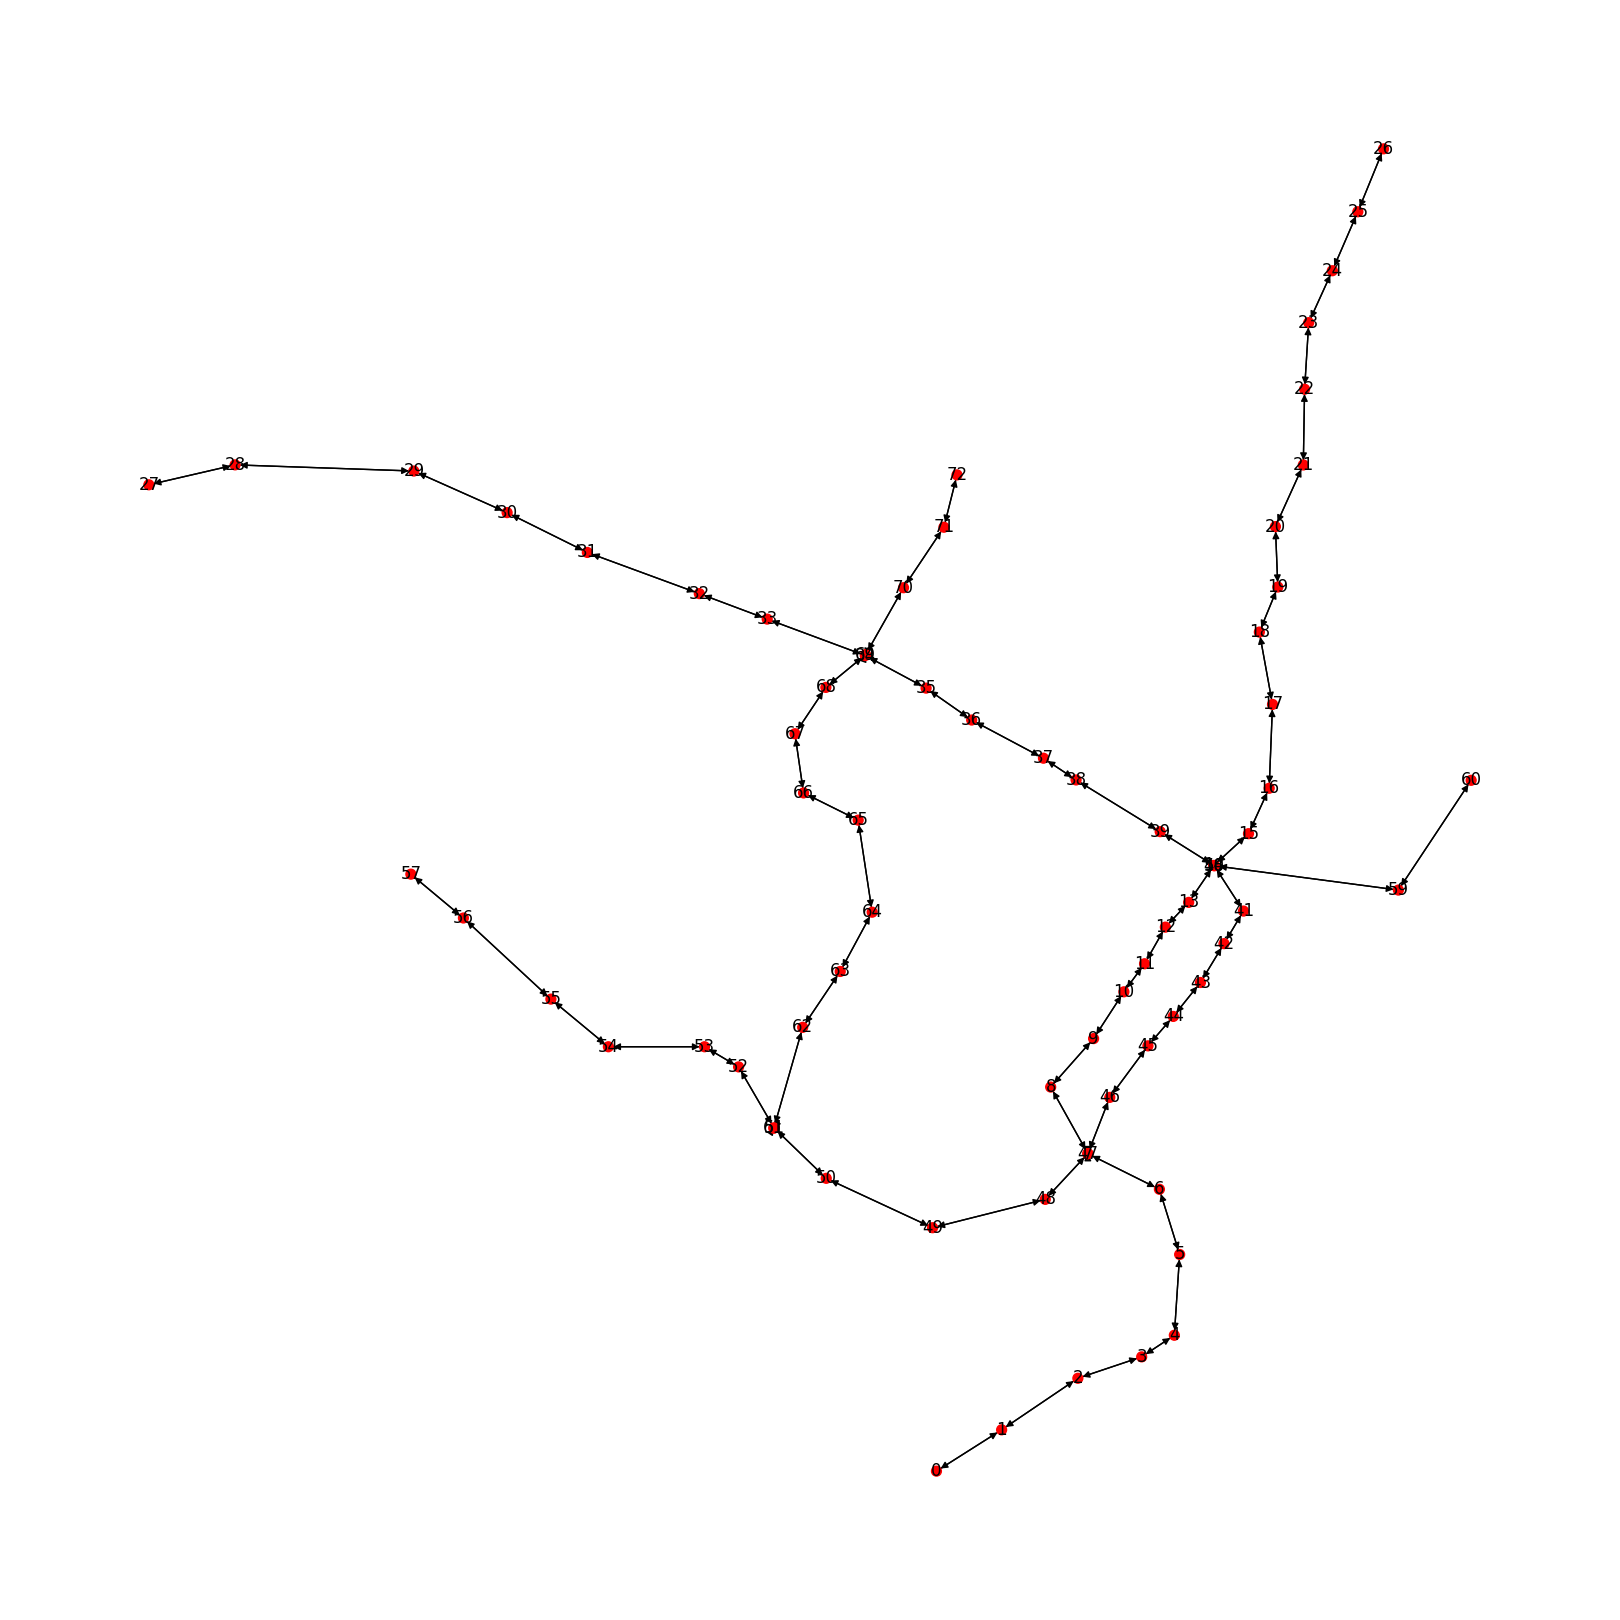

In [80]:
g.show()

In [81]:
g.add_centroids()

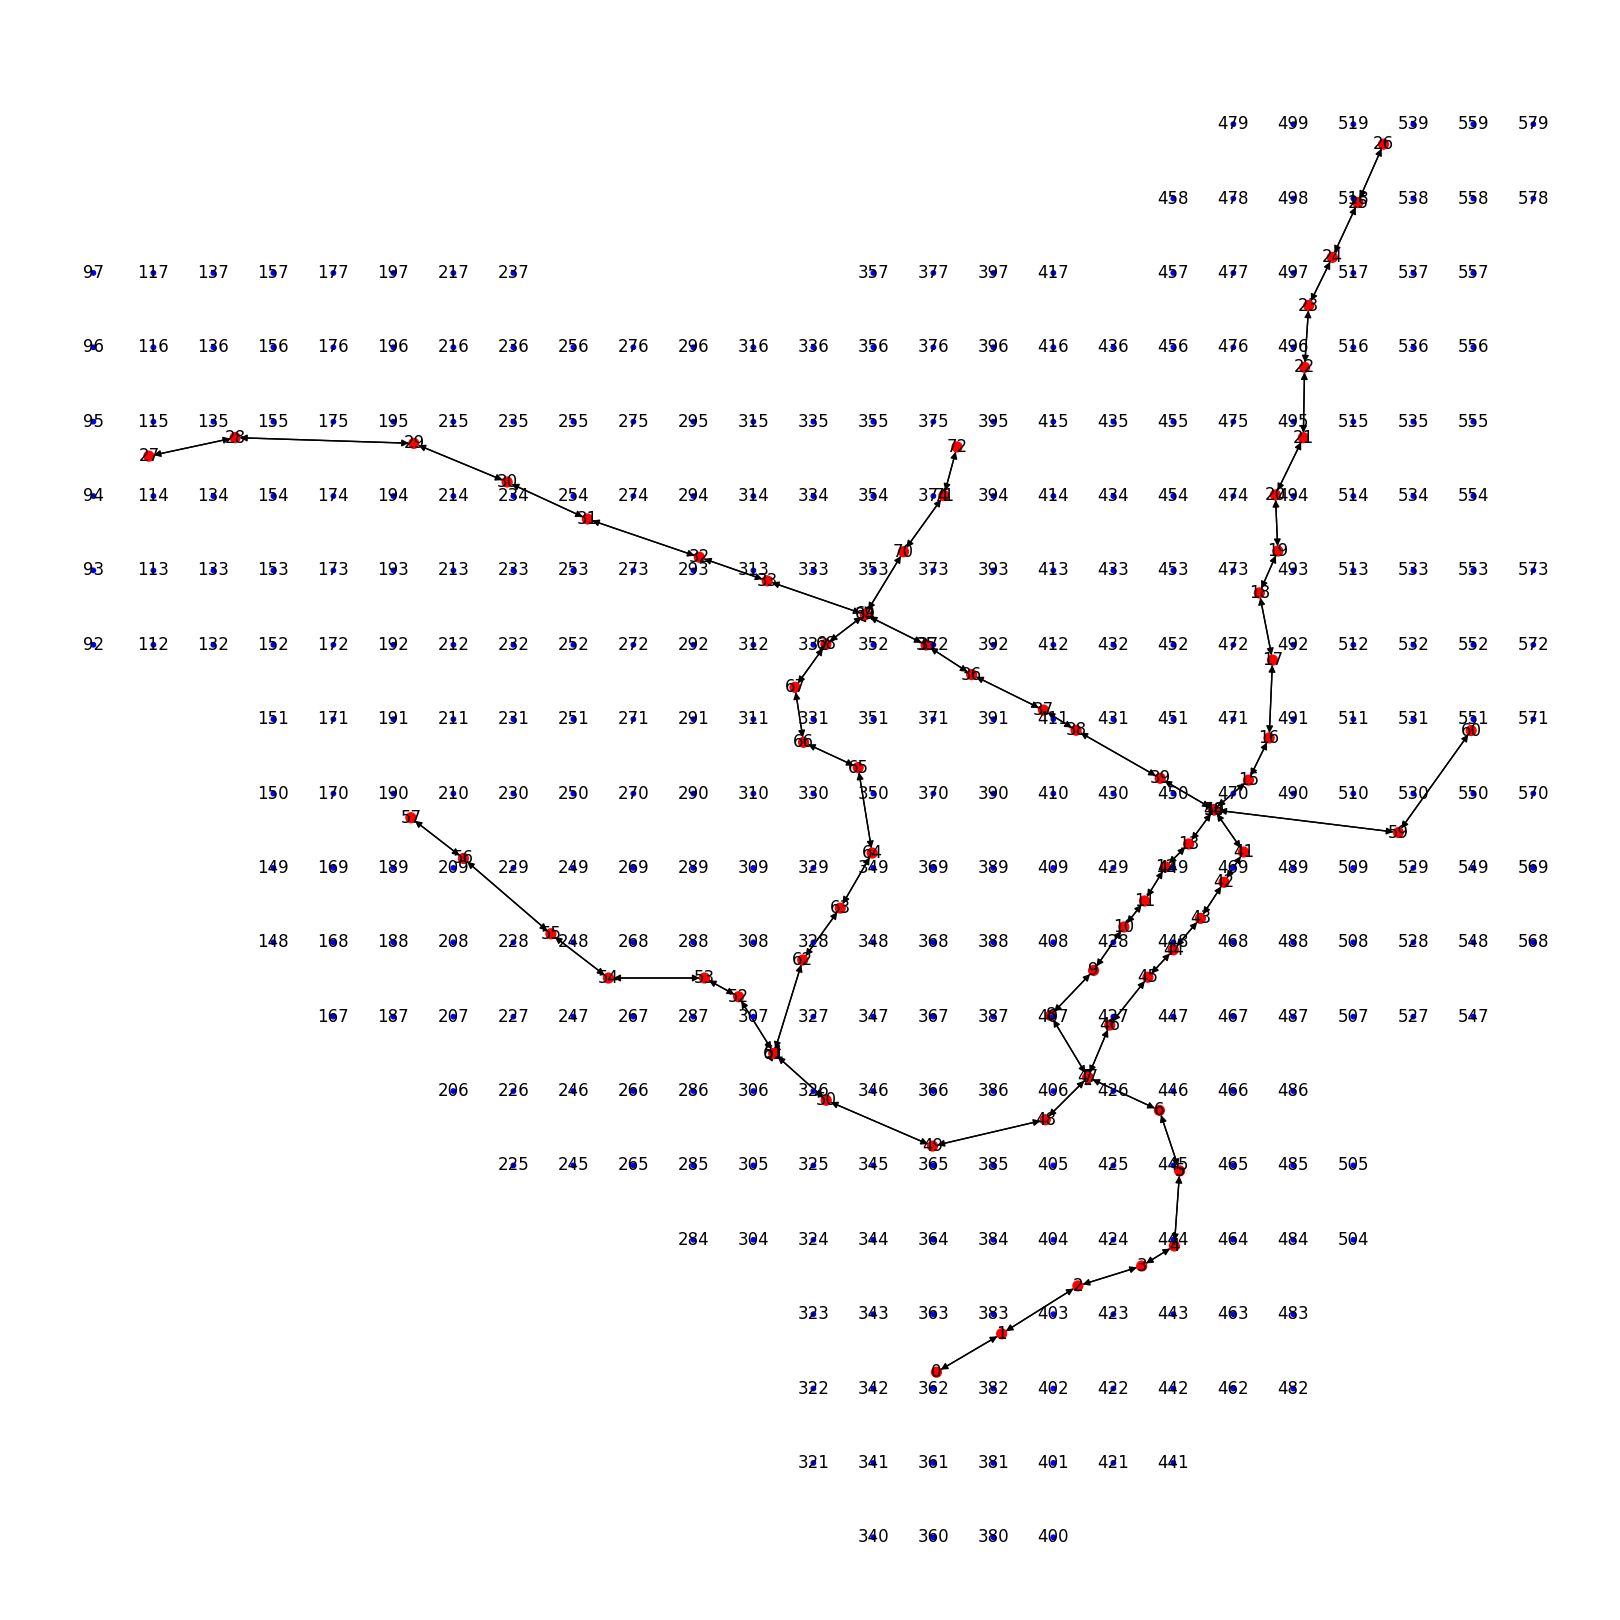

In [82]:
g.show()

In [83]:
g.add_edge_between_centroids()

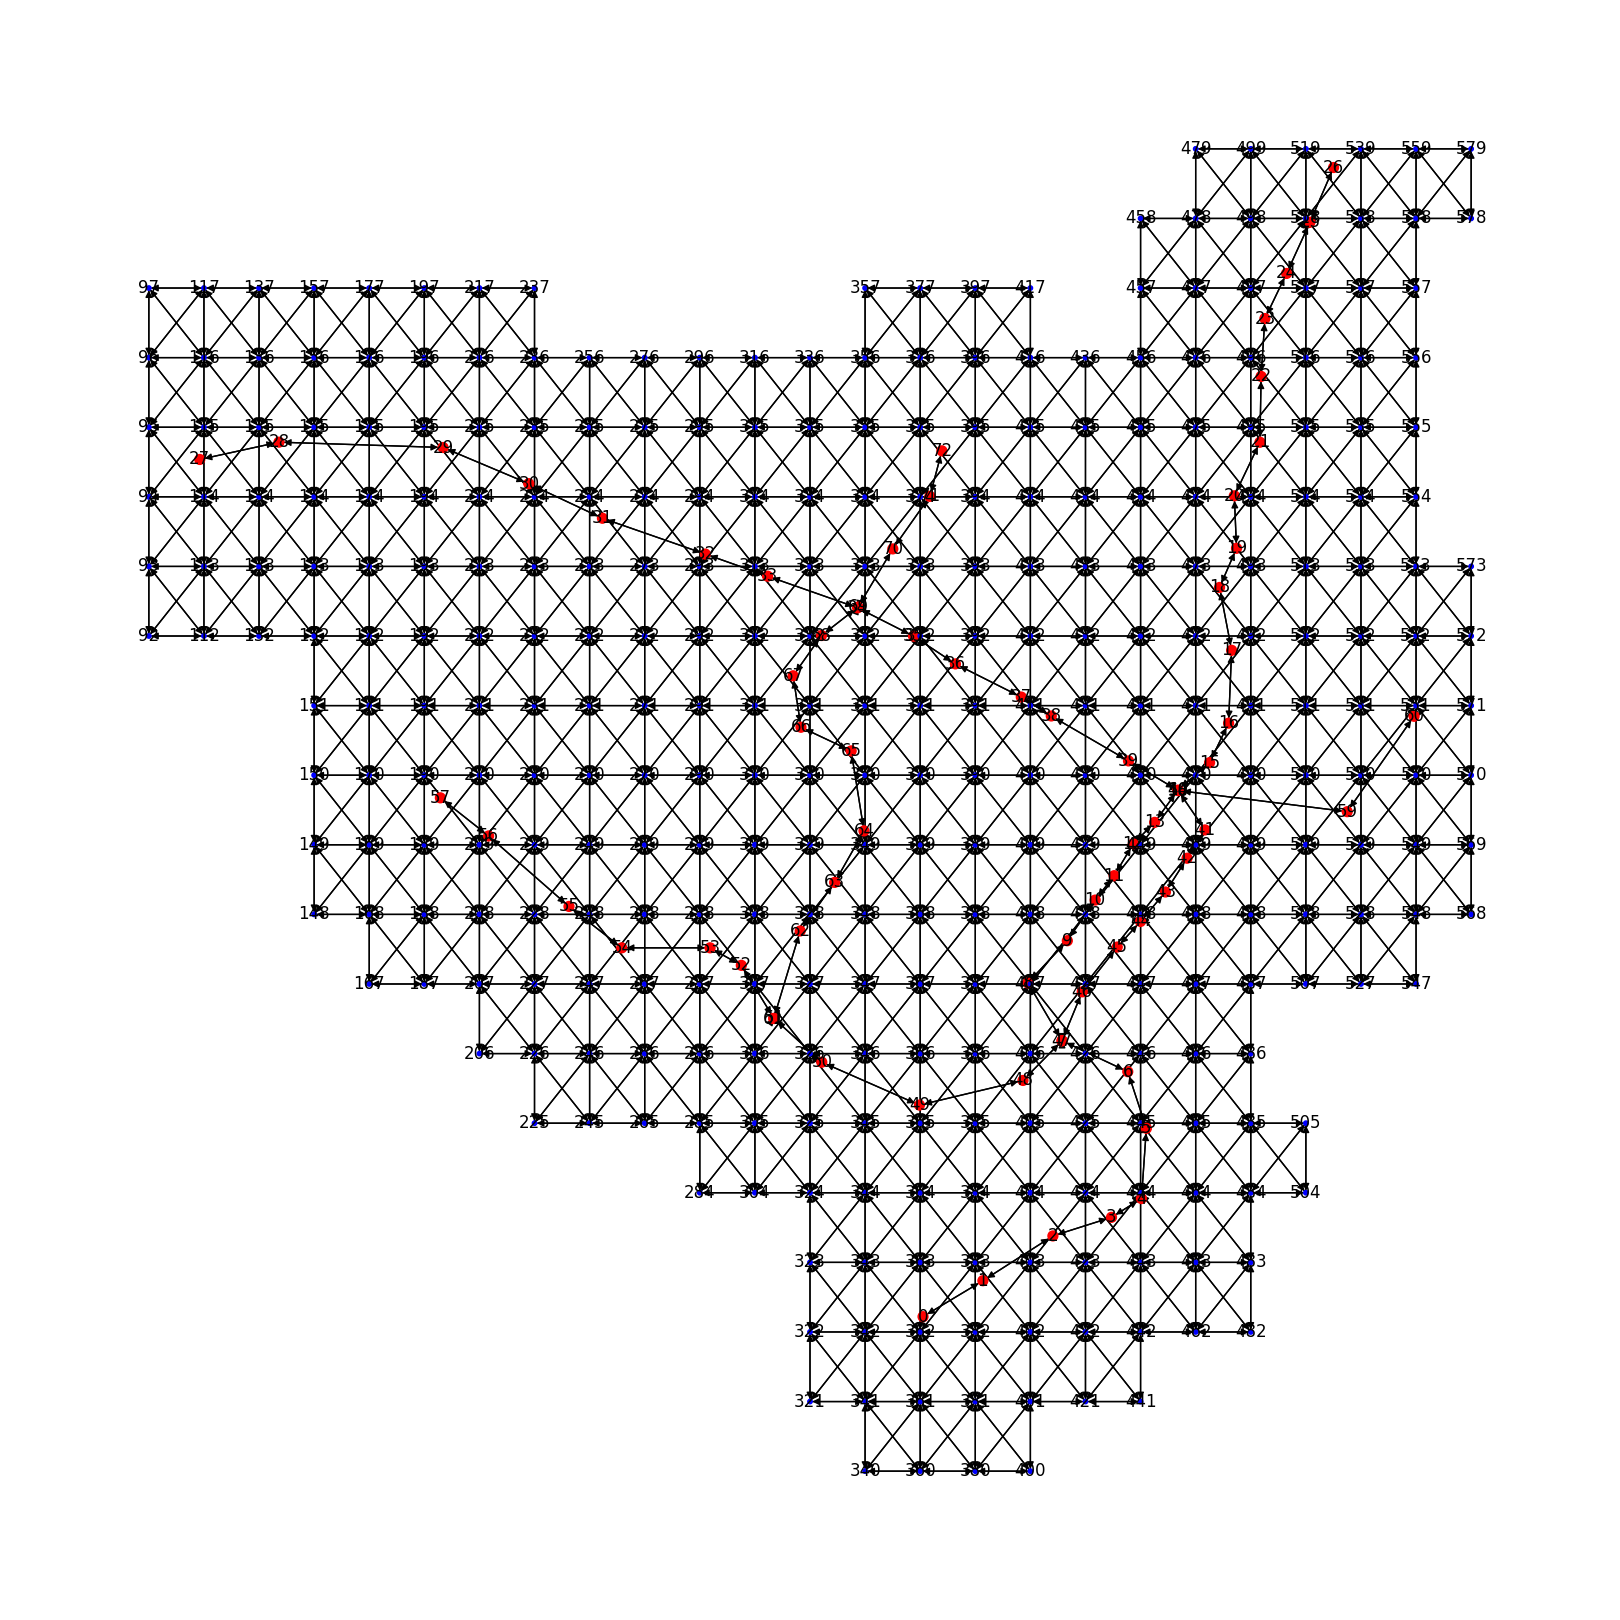

In [84]:
g.show()

In [85]:
g.add_edge_between_centroid_and_station()

In [86]:
import time
t_0 = time.time()
Initial_acc = np.array(g.get_acc()[1])
t_1 = time.time()
print(t_1 - t_0)

4.080085039138794


In [87]:
centroid_polulation = g.centroid_polulation
total_polulation = g.total_polulation
print(total_polulation)

1180140


## 2. AccEq-DRT Algorithm

In [88]:
# All alternative areas
list_area = []
for i in range(80,580, 20):
    if i in g.centroid_node and i+1 in g.centroid_node and \
      i+20 in g.centroid_node and i+21 in g.centroid_node and \
      i+40 in g.centroid_node and i+41 in g.centroid_node:

        list_area_population = [centroid_polulation[i],
                                centroid_polulation[i+1],
                                centroid_polulation[i+20],
                                centroid_polulation[i+21],
                                centroid_polulation[i+40],
                                centroid_polulation[i+41] ]

        if len( [ i for i in list_area_population if i == 0 ] ) <= 2:
            # We only consider areas that contain at most 2 0-population tiles
            list_area.append([i,i+1,i+20,i+21,i+40,i+41])

len(list_area)

# 0 zero population: 206
# 1 zero population: 27
# 2 zero population: 15
# 3 zero population: 3
# 4 zero population: 6
# 5 zero population: 4
# 6 zero population: 2
# 248 = 206 + 27 + 15

2

In [89]:
list_area

[[340, 341, 360, 361, 380, 381], [360, 361, 380, 381, 400, 401]]

In [90]:
def find_s1(area, g):
  """
  Find point "s_1" (see the paper) that is the first point visited by the
  DRT bus when it enters the area
  """
  s1 = (g.centroid_to_pos[area[4]] + g.centroid_to_pos[area[5]])/2 + np.array([0.5,0])
  return s1

def findAssociatedStop(area, g):
  DRT_s_1 = find_s1(area, g)
  distance_station_area_list = []
  for i in g.metro_node:
    metro_pos_i = np.array(g.metro_pos[i])
    distance_station_area_list.append( np.linalg.norm( metro_pos_i - DRT_s_1 ) )
  return np.argmin( distance_station_area_list )


In [91]:
def findWorstArea(g):
# Find area with worst Score and its nearest metro station

    alpha = 0.25

    list_acc =  g.get_acc()[1]

    # Get the ranks of centroids related to accessibility and population
    # index_acc_dict: dict{ centroid index -> rank of acc }
    # index_popu_dict: dict{ centroid index -> rank of population }
    index_acc = np.argsort(list_acc)
    index_popu = np.argsort(list(centroid_polulation.values()))
    index_acc_dict = {}
    index_popu_dict = {}
    for i in range(len(g.centroid_node)):
        index_acc_dict[g.centroid_node[index_acc[i]]] = i
        index_popu_dict[g.centroid_node[index_popu[i]]] = i


    score_list = []
    for area_ in list_area:
        score_ = [] # list of scores of the tiles belonging to area
        for i in area_:
            if centroid_polulation[i] == 0:
                score_.append(0)
            else:
                # score(c_i) = alpha*population_rank(c_i) + （1-alpha)*(total_nb_centroids - accessibility_rank(c_i) )
                score_.append( alpha*index_popu_dict[i]+ (1-alpha)*(len(g.centroid_node)-index_acc_dict[i]) )

        score_list.append( np.sum(score_)/len(np.nonzero(score_)[0]) )

    worst_area = list_area[np.argmax(score_list)]

    # The following line is not strictly needed
    score_list.sort(reverse=True) #print('worst 30 score_list :',score_list[:30])

    stop = findAssociatedStop(worst_area, g)

    return [stop,worst_area] #[ nearest metro station, worst area ]

In [92]:
def calcualtePho(metro_station_s_A,centroid_i,g):
    """
    Calculate what proportion of demands go from centroid_i to somewhere else via
    metro_station_s_A.
    """
    beta = 0.12
    length =  nx.all_pairs_dijkstra_path_length(g.g)
    index = []
    for i, dict_ in length:
        if i == centroid_i:
            a = []
            for j in list(dict_.keys()):
                if j in g.centroid_node and j!=i:
                    index.append( j )
                    a.append( centroid_polulation[j]*np.exp( - beta*dict_[j]  ) )
            a = np.array(a)
    b = a/np.sum(a)
    c = {}
    for k in range(len(b)):
        c[index[k]] = b[k] # if index[k] = j, b[k] represents the proportion of demands go from centroid_i centroid j.

    pho = 0.0
    path = nx.all_pairs_dijkstra_path(g.g)
    for i, dict_ in path:
        if i== centroid_i:
            for j in dict_.keys():
                if j in g.centroid_node and j!=i and metro_station_s_A in dict_[j]:
                    pho = pho + c[j]
    return pho

In [93]:
from sympy import *

def getHx(n_bus,pho,distance_station_area):
    """
    Solve the system of equations to find the headway of the DRT into an area
    Returns the headway in hours
    """
    v_bus = 25 #25 km/h
    l = 1      #1 km
    tau_s = 32/3600 #32 s
    tau_T = 60/3600 #60 s
    h = symbols('h')
    #TODO: for the moment, we assume that the DRT demand is symmetric, i.e.,
    #  the demand out (pax using DRT as first mile) = demand in (pax using DRT in their last mile).
    #  This assumption might not be true and should be removed
    h_x = solve( (2*distance_station_area + 6*l*(2*pho*l*l*h)/(2*pho*l*l*h+1)+(2*pho*l*l*h)*l/3+l*4/3)/v_bus + tau_s*(2*pho*l*l*h) + tau_T - n_bus*h  , h)

    #TODO: Take the smallest postive solution instead of what we do now
    if len(h_x) == 0:
        print('bug h_x no solution!') #TODO: We should rise an exception instead
    elif len(h_x) == 1:
        return float(h_x[0])
    else:
#         print('2 solutions',float(h_x[0]),float(h_x[1]))
        return max( float(h_x[0]),float(h_x[1]) )

In [143]:
def assignDRT(n_bus,area_descr,g):
    """
    Assign DRT to an area and updates demand and performance indicators therein.

    Returns the headway after traffic assignment convergence
    """
    # Assign n_bus DRT buses to current worst area area_descr.

    demand_before = 0
    list_of_tiles = area_descr
    metro_station = findAssociatedStop(list_of_tiles, g)
    hx = 0 # headway
    print("List of tiles ", list_of_tiles)

    # For the moment we have a maximum limit of assignment iterations because
    # we do all-or-nothing assingment, we in few cases causes the typical
    # instability and we could go on an infinite amount of time
    #TODO: improve traffic assignment
    for i in range(5):
        print("Traffic assignment iteration ", i)
        demand_total = 0.0
        demand_list = []
        for j in list_of_tiles:
            trip_generation_rate = 0.16
            pt_mode_share = 0.124
            demand_ = calcualtePho(metro_station,j,g)*centroid_polulation[j]*trip_generation_rate*pt_mode_share  # xxxx demands/km2/hour
            demand_total = demand_total + demand_
            demand_list.append( demand_ )

        print()

        if i == 0 :
            demand_before = demand_total
        else:
            if np.abs( (demand_before - demand_total)/demand_before ) <= 0.05 and i!=0:
                print('stable')
                break
            demand_before = demand_total


        DRT_s_1 = find_s1(list_of_tiles,g)
        metro_station_s_A_pos = np.array(g.metro_pos[metro_station])
        distance_station_area = np.linalg.norm( metro_station_s_A_pos - DRT_s_1 )

        print ("Computing headway")
        hx = getHx(n_bus,demand_total,distance_station_area)
        print ("Headway is ", hx)
        if hx <= 0:
            return 0 # Maybe we don't have enough DRT buses. We don't update the network
        else:
            alpha_0_list = []
            phi_i_list = [demand_list[5],demand_list[3],demand_list[1],demand_list[0],demand_list[2],demand_list[4]]
            for i in range(len(phi_i_list)):
                if i==5:
                    alpha_0_list.append( phi_i_list[i]/2/np.sum(phi_i_list) )
                else:
                    alpha_0_list.append( (phi_i_list[i]/2 + np.sum(phi_i_list[i+1:]))/np.sum(phi_i_list) )
            list_1 = [alpha_0_list[3],alpha_0_list[2],alpha_0_list[4],alpha_0_list[1],alpha_0_list[5],alpha_0_list[0]]

            for tile in range(len(list_of_tiles)):
                j = list_of_tiles[tile]
                time_alpha = list_1[tile]
                v_bus = 25 #25 km/h
                print('centroid and time (minutes)',j, 60*time_alpha*(hx*n_bus-2*distance_station_area/v_bus) + distance_station_area/v_bus)
                g.add_connection( [(j,metro_station, hx/2+ time_alpha*(hx*n_bus-2*distance_station_area/v_bus) + distance_station_area/v_bus)] )
                g.add_connection( [(metro_station,j, hx/2+ time_alpha*(hx*n_bus-2*distance_station_area/v_bus) + distance_station_area/v_bus)] )
                #TODO: before adding a DRT link, we should remove previous DRT links related
                #    to the same connection

    return hx

In [144]:
def isHxOk(n_bus,area_descr,g):
    list_of_tiles = area_descr
    metro_station_id = findAssociatedStop(list_of_tiles, g)

    demand_total = 0.0
    for j in list_of_tiles:
        demand_ = calcualtePho(metro_station_id,j,g)*centroid_polulation[j]*0.16
        demand_total = demand_total + demand_

    DRT_s_1 = find_s1(list_of_tiles, g)
    metro_station_s_A_pos = np.array(g.metro_pos[metro_station_id])
    distance_station_area = np.linalg.norm( metro_station_s_A_pos - DRT_s_1 )


    hx = getHx(n_bus,demand_total,distance_station_area)
    if hx <= 0:
        return 0
    else:
        return 1

In [145]:
allocation = {
    0 : 200,
    1 : 4000
 }

In [146]:
def allocateDRT(allocation):
  for area_id in allocation:
    try:
      area = list_area[area_id]
    except IndexError:
      print("Area ", area_id, " does not exist")

    print ("Assigning buses to area ", list_area[area_id])
    hx = assignDRT(allocation[area_id],list_area[area_id],g)
    print ("headway of area ", area_id, " is ", hx*60," minutes\n")

In [ ]:
import time
t_0 = time.time()

allocateDRT(allocation)

t_1 = time.time()
print("Time for assigning DRT: ",t_1-t_0)

Assigning buses to area  [340, 341, 360, 361, 380, 381]
List of tiles  [340, 341, 360, 361, 380, 381]
Traffic assignment iteration  0

Computing headway
Headway is  0.0015753727999242887
centroid and time (minutes) 340 2.13371862035251
centroid and time (minutes) 341 5.978247498243934
centroid and time (minutes) 360 0.3138614482046118
centroid and time (minutes) 361 8.082932142291417
centroid and time (minutes) 380 0.1720574322935839
centroid and time (minutes) 381 8.151992839829324
Traffic assignment iteration  1

Computing headway
Headway is  0.0019902264172783767
centroid and time (minutes) 340 9.45979859115534
centroid and time (minutes) 341 11.804678906751427
centroid and time (minutes) 360 6.231754190606288
centroid and time (minutes) 361 13.092220564066682
centroid and time (minutes) 380 2.0843494331860173
centroid and time (minutes) 381 13.144450786515215
Traffic assignment iteration  2

Computing headway
Headway is  0.0015729007402276235
centroid and time (minutes) 340 2.14249

In [ ]:
### MAIN PROCEDURE

list_opt_acc = {}


dict_worst_station_area = {}
n_bus = 1500
steps = int(n_bus/10)
for i in range(steps):
    print('Step',i,':')
    worst_ = findWorstArea(g)
    list_of_tiles = worst_[1]
    print('    Current worst area',list_of_tiles,' and metro station nearest:',worst_[0])
    print('    Accessibility before',[g.centroid_to_acc[p] for p in list_of_tiles] )

    metro_station = worst_[0]
    first_centroid = list_of_tiles[0] #1st centroid of the area
    if (metro_station,first_centroid) in dict_worst_station_area.keys():
        # we already previously added DRT buses to this area. We just increase by 10

        dict_worst_station_area[ (metro_station,first_centroid) ] = dict_worst_station_area[ (worst_[0],list_of_tiles[0]) ] + 10
    else:
        dict_worst_station_area[ (metro_station,first_centroid) ] = 10

    print('    DRT allocation:')
    for key,value in dict_worst_station_area.items():
        print('        Metro station and 1st centroid {key} -> {value} buses'.format(key = key, value = value))

    if isHxOk(dict_worst_station_area[ (worst_[0],list_of_tiles[0]) ],worst_,g) == 0:
        print('    Nb of buses too small for (station, area) {key}  -----> Not change'.format(key = (worst_) ) )
        print('--------------------------------------------------------------------------')

        # To keep historical data, we save our intermediary results every 5 steps
        if (i+1)%5 == 0:
            list_opt_acc[10*(i+1)] = np.array( g.get_acc()[1] )


        continue # This "continue" is useless
    else:
        DRT_buses_currently_deployed_in_the_area = dict_worst_station_area[ (metro_station,first_centroid) ]
        assignDRT(DRT_buses_currently_deployed_in_the_area, list_of_tiles g)
        ooo = g.get_acc()
        print('    Acc after',[g.centroid_to_acc[p] for p in list_of_tiles] )
        print('----------------------------------------------------------------')

        if (i+1)%5 ==0:
            list_opt_acc[10*(i+1)] = np.array( g.get_acc()[1] )

In [ ]:
t_1 = time.time()
print(t_1-t_0)

In [ ]:
# We print the history of the optimization
# list_opt_acc is a dictionary of {(DRT used in total, [list of acc. of all tiles])}
list_opt_acc.keys()

dict_keys([50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500])

In [ ]:
@

SyntaxError: invalid syntax (3270386722.py, line 1)

## 3. Analyze results

In [ ]:
DRT allocation:
    Bus stop 28  [] -> 210 buses          people/bus
    in-bus time（） [0.83,0.98,0.53,1.01,0.24,1.13] pho 2812


In [ ]:
in_bus_time = np.array([
    [0.83,0.98,0.53,1.01,0.24,1.13],
    [0.51,0.61,0.37,0.70,0.18,0.79],
    [0.25,0.25,0.25,0.25,0.19,0.37],
    [0.14,0.27,0.13,0.55,0.13,0.75],
    [0.65,0.70,0.52,0.79,0.25,0.92],
    [0.48,0.55,0.40,0.61,0.23,0.66],
    [3.02,5.36,0.96,7.30,0.09,8.08],
    [0.79,1.24,0.57,1.81,0.24,2.27],
    [0.50,1.25,0.10,2.50,0.10,3.80],
    [1.29,1.67,0.90,1.83,0.44,1.84],
    [0.12,0.17,0.07,1.51,0.03,4.13]
])

In [ ]:
in_bus_time

In [ ]:
poi11 =np.reshape(in_bus_time,-1)
plt.bar(range(len(poi11)),poi11)

In [ ]:
len(people_per_bus) + 1

In [ ]:
people_per_bus = [ 14,11,28,23,12,36,21,19,21,16 ]

In [ ]:
min(people_per_bus)

In [ ]:
max(people_per_bus)

In [ ]:
np.mean(people_per_bus)

In [ ]:
plt.bar(range(len(people_per_bus)),people_per_bus)

In [ ]:
plt.boxplot(people_per_bus)

In [ ]:
3135.6175957356027 / 50

In [ ]:
@